### Biggest Soccer Club of Rio Grande do Sul/Brazil - According to the Number of Championships Won (From birth to 2019)

Internacional x Grêmio (GRENAL) is one of the biggest soccer rivalries in the World. It's like Boca Juniors x River Plate – Buenos Aires, Argentina. Lazio v. Roma – Rome, Italy, Barcelona v. Real Madrid – Spain.

So, I gonna to compare the both clubs, to see which is the biggest according to the number of championships awarded. To this, I'm gonna considerate only the expressive Championships from Rio Grande do Sul, Brazil and South America.

The datasates can be finded on Wikipedia: [Wikipedia Inter](https://pt.wikipedia.org/wiki/T%C3%ADtulos_do_Sport_Club_Internacional) and [Wikipedia Gremio](https://pt.wikipedia.org/wiki/T%C3%ADtulos_do_Gr%C3%AAmio_Foot-Ball_Porto_Alegrense).

We gonna to see the count of titles awarded, and the championships separately too.

Kick-off!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import warnings

%matplotlib inline

warnings.filterwarnings('ignore')

### Extract
Now we be abble to load the datasets using the `read_html()` method from pandas.

Using this method on webpages that contains most of one tables, all of then are returned to us on a list. So, we need to specify which table we gonna to use.
In this case, the first (0).

In [2]:
link_inter = 'https://pt.wikipedia.org/wiki/T%C3%ADtulos_do_Sport_Club_Internacional'
link_gremio = 'https://pt.wikipedia.org/wiki/T%C3%ADtulos_do_Gr%C3%AAmio_Foot-Ball_Porto_Alegrense'


df_inter = pd.read_html(link_inter, header=1)[0]
df_gremio = pd.read_html(link_gremio, header=1)[0]

In [3]:
df_inter.head()

,Unnamed: 0,Competição,Títulos,Temporadas
0,NaN,Tríplice Coroa Internacional,1,2007
1,MUNDIAIS,MUNDIAIS,MUNDIAIS,MUNDIAIS
2,NaN,Competição,Títulos,Temporadas
3,NaN,Copa do Mundo de Clubes da FIFA,1,2006
4,CONTINENTAIS,CONTINENTAIS,CONTINENTAIS,CONTINENTAIS


In [4]:
df_gremio.head()

,Unnamed: 0,Competição,Títulos,Unnamed: 3,Temporadas
0,NaN,Copa Europeia/Sul-Americana de 1983 [1][2],1,NaN,1983
1,INTERCONTINENTAIS,INTERCONTINENTAIS,INTERCONTINENTAIS,INTERCONTINENTAIS,INTERCONTINENTAIS
2,NaN,Competição,Títulos,NaN,Temporadas
3,NaN,Copa Sanwa Bank,1,NaN,1995
4,CONTINENTAIS,CONTINENTAIS,CONTINENTAIS,CONTINENTAIS,CONTINENTAIS


### Data Cleansing

First, we can drop the Unnamed columns

In [5]:
df_inter.drop('Unnamed: 0', axis=1, inplace=True)
df_gremio.drop(['Unnamed: 0', 'Unnamed: 3'], axis=1, inplace=True)

Seeing the columns and values

In [6]:
df_inter

,Competição,Títulos,Temporadas
0,Tríplice Coroa Internacional,1,2007
1,MUNDIAIS,MUNDIAIS,MUNDIAIS
2,Competição,Títulos,Temporadas
3,Copa do Mundo de Clubes da FIFA,1,2006
4,CONTINENTAIS,CONTINENTAIS,CONTINENTAIS
5,Competição,Títulos,Temporadas
6,Copa Libertadores da América,2,2006 e 2010
7,Copa Sul-Americana,1,2008
8,Recopa Sul-Americana,2,2007 e 2011
9,INTERNACIONAIS,INTERNACIONAIS,INTERNACIONAIS


In [7]:
df_gremio

,Competição,Títulos,Temporadas
0,Copa Europeia/Sul-Americana de 1983 [1][2],1,1983
1,INTERCONTINENTAIS,INTERCONTINENTAIS,INTERCONTINENTAIS
2,Competição,Títulos,Temporadas
3,Copa Sanwa Bank,1,1995
4,CONTINENTAIS,CONTINENTAIS,CONTINENTAIS
5,Competição,Títulos,Temporadas
6,Copa Libertadores da América,3,"1983, 1995 e 2017"
7,Recopa Sul-Americana,2,1996 e 2018
8,NACIONAIS,NACIONAIS,NACIONAIS
9,Competição,Títulos,Temporadas


Ok, the datasets contains a lot of garbage, 'cause the tabulated data on Wikipedia had several separators, which were some subtitles saying the type of the championships bellow.

So, we can select only the rows which contains the desired championships to see.

They are:

* Copa Libertadores da América (South América)
* Copa Sul-Americana (South América)
* Recopa Sul-Americana (South América)
* Campeonato Brasileiro (Brazil)
* Copa do Brasil (Brazil)
* Supercopa do Brasil (Brazil)
* Campeonato Gaúcho (Rio Grande do Sul)
* Copa FGF Rio Grande do Sul)
* Copa da Região Sul-Fronteira
* Recopa Gaúcha
* Super Copa Gaúcha

In [8]:
df_inter['Competição'] = df_inter['Competição'].str.replace(' Recordista', '')

championships = ['Copa Libertadores da América', 'Copa Sul-Americana', 
                 'Recopa Sul-Americana', 'Copa da Região Sul-Fronteira', 
                 'Copa FGF','Copa da Região Sul-Fronteira',  
                 'Recopa Gaúcha', 'Super Copa Gaúcha', 
                 'Campeonato Brasileiro', 'Copa do Brasil', 
                 'Supercopa do Brasil', 'Campeonato Gaúcho']

df_inter = df_inter[df_inter['Competição'].isin(championships)]
df_gremio = df_gremio[df_gremio['Competição'].isin(championships)]

Setting a new column, to discretize which club what is.

In [9]:
df_inter['Clube'] = 'Inter'
df_gremio['Clube'] = 'Grêmio'

### Merging data

In [10]:
df = df_inter.append(df_gremio)

In [11]:
df

,Competição,Títulos,Temporadas,Clube
6,Copa Libertadores da América,2,2006 e 2010,Inter
7,Copa Sul-Americana,1,2008,Inter
8,Recopa Sul-Americana,2,2007 e 2011,Inter
14,Campeonato Brasileiro,3,"1975, 1976 e 1979",Inter
15,Copa do Brasil,1,1992,Inter
21,Campeonato Gaúcho,45,"1927, 1934, 1940, 1941, 1942, 1943, 1944, 1945...",Inter
22,Copa FGF,2,2009 e 2010,Inter
23,Copa da Região Sul-Fronteira,1,2016,Inter
24,Recopa Gaúcha,2,2016 e 2017,Inter
25,Super Copa Gaúcha,1,2016,Inter


In [12]:
# fix non int 
df['Títulos'] = pd.to_numeric(df['Títulos']) 

In [13]:
total = df.groupby('Clube')['Títulos'].sum()
total = total.to_frame().reset_index()
total

,Clube,Títulos
0,Grêmio,54
1,Inter,60


### Dataviz

Let's show what they are and how many championships have been won

<Figure size 432x288 with 0 Axes>

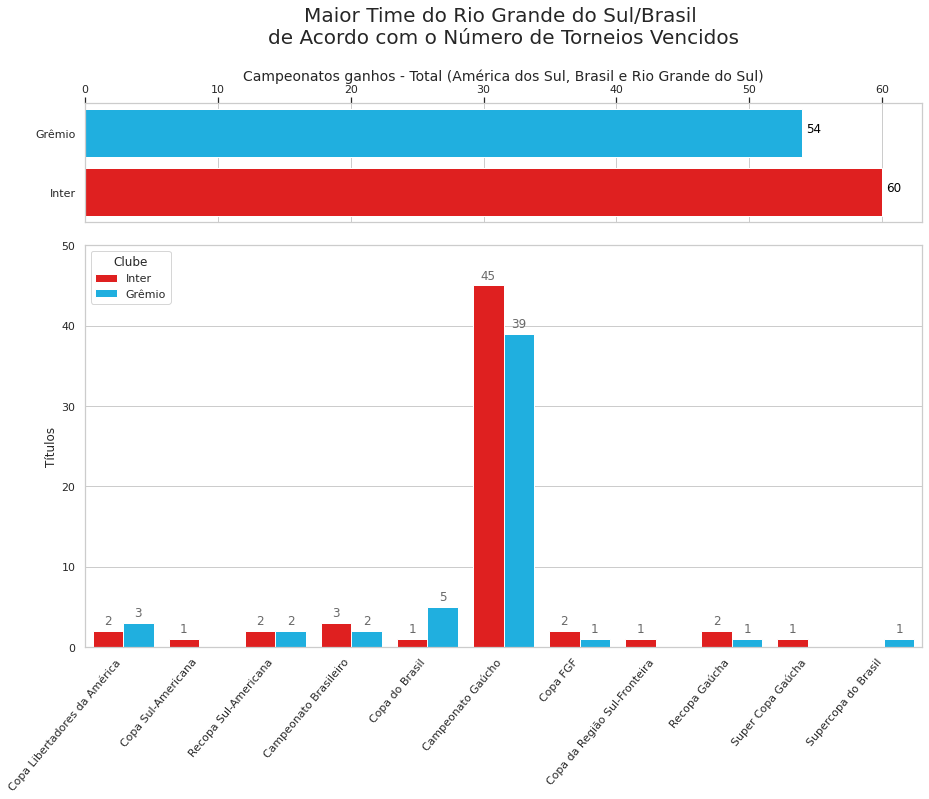

In [14]:
sns.set(style="whitegrid")
#sns.set_context("notebook")
sns.despine(left=True, bottom=True)
#sns.despine()

plt.figure(figsize=(15, 10));
# f, axes = plt.subplots(2, 1, figsize=(15,10))

gs = gridspec.GridSpec(4,1);

#PRIMEIRO PLOT
ax = plt.subplot(gs[:1, :1]);
total_chart = sns.barplot(y='Clube', x='Títulos', palette=['deepskyblue', 'red'], orient='h', data=total, ax=ax);
ax.set_ylabel('') # gambiarra removendo o y label    
ax.set_xlabel('Campeonatos ganhos - Total (América dos Sul, Brasil e Rio Grande do Sul)', fontsize=14);
ax.xaxis.set_label_position('top') # colocanto o X label pra cima
ax.xaxis.tick_top() # colocando os tick pra cima
plt.title('Maior Time do Rio Grande do Sul/Brasil \nde Acordo com o Número de Torneios Vencidos', fontsize=20, pad=60);

# colocando anotacoes horizontais
for p in total_chart.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38, int(p.get_width()), fontsize=12, color='black')

#SEGUNDO PLOT
ax = plt.subplot(gs[1:4, :]) #segundo prot vai do segundo ao quarto plot
year_chart = sns.barplot(x='Competição', y='Títulos', hue='Clube', data=df, palette=['red', 'deepskyblue'], ax=ax);

# inclinar as legendas
year_chart.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=50, 
    horizontalalignment='right',
);

ax.set_xlabel('') # gambiarra removendo o x label  

#anotacoes verticais
for p in year_chart.patches:
             year_chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='dimgrey', xytext=(0, 10),
                 textcoords='offset points')
_ = year_chart.set_ylim(0,50); #Para as anotacoes nao passarem o max




### Conclusion

We can see that Internacional has more total titles than Grêmio. But Grêmio has more Copa do Brasil. 

so

In Rio Grande do Sul level, the **S.C. Internacional** is the **biggest soccer club**!

----

P.S. I write this entire notebook only in english. My english is a work in progress. I know that has some mistakes XD
